In [5]:
import sys
sys.path.append("../")

from Experiments.utils import DataFunctions

import numpy as np
import quimb as qu
import quimb.tensor as qtn

# gen gates for quantum phase estimation
start with quantum phase estimation.

2 registers, work and aux,

1. work qubits are initialized to $|0\rangle$ and aux qubits are initialized to $|\Psi \rangle$ an eigen vector of $U$ (not critical its an eigen value)

2. controled phase gates are applied

3. quantum fourier transform

TODO:
- check results
- pull out metrics after each step


In [111]:
def hadamard_layer(circ,n,m, gate_round=None):
    """Apply a parametrizable layer of single qubit ``U3`` gates.
    """
    for i in range(n):
        # initialize with random parameters
        # params = qu.randn(3, dist='uniform')
        circ.apply_gate(
            'H',i,gate_round=gate_round)

def aux_init(circ,n,m,gate_round = None):
    for i in range(m):
        # initialize with random parameters
        params = qu.randn(3, dist='uniform')
        circ.apply_gate(
            'U3', *params, n+i,
            gate_round=gate_round, parametrize=True)

def U_layer(circ,n,m, gate2='CZ', reverse=False, gate_round=None):
    """apply controlled phase gates
    """
    for i in range(n):
        for _ in range(i+1):
            print(i,n)
            circ.apply_gate(qu.ncontrolled_gate(1,qu.phase_gate(np.pi/4)),i,n,gate_round=gate_round)
    # regs = range(0, circ.N - 1)
    # if reverse:
    #     regs = reversed(regs)

    # for i in regs:
    #     circ.apply_gate(
    #         gate2, i, i + 1, gate_round=gate_round)
def qft_layer(circ,n,m,gate_round=None):
    for i in range(n):
        circ.apply_gate("H",i,gate_round=gate_round)
        for j in range(n-i):
            circ.apply_gate(qu.ncontrolled_gate(1,qu.phase_gate(2*np.pi/(2**(j+1)))),i+j+1,i,gate_round=gate_round)
def qpe_circuit(n,m, depth, gate2='CZ', **kwargs):
    """Construct a circuit of single qubit and entangling layers.
    """
    circ = qtn.Circuit(n+m, **kwargs)
    hadamard_layer(circ,n,m)
    aux_init(circ,n,m)
    U_layer(circ,n,m)
    qft_layer(circ,n,m)
    # for r in range(depth):
    #     # single qubit gate layer
    #     single_qubit_layer(circ, gate_round=r)

    #     # alternate between forward and backward CZ layers
    #     two_qubit_layer(
    #         circ, gate2=gate2, gate_round=r, reverse=r % 2 == 0)

    # # add a final single qubit layer
    # single_qubit_layer(circ, gate_round=r + 1)

    return circ

In [112]:
circ.apply_gate(qu.phase_gate(np.pi/2),2)

In [113]:
n = 3
m = 1 #number of 
depth = 9
gate2 = 'CZ'

circ = qpe_circuit(n,m, depth, gate2=gate2)
# for i in range(n):
#     circ.apply_gate(qu.ncontrolled_gate(1,qu.phase_gate(np.pi/2)),i,3)
circ

0 3
1 3
1 3
2 3
2 3
2 3


<Circuit(n=4, num_gates=19, gate_opts={'contract': 'auto-split-gate', 'propagate_tags': 'register'})>

In [114]:
qu.ncontrolled_gate(1,qu.phase_gate(np.pi/2))

[[1.000000e+00+0.j 0.000000e+00+0.j 0.000000e+00+0.j 0.000000e+00+0.j]
 [0.000000e+00+0.j 1.000000e+00+0.j 0.000000e+00+0.j 0.000000e+00+0.j]
 [0.000000e+00+0.j 0.000000e+00+0.j 1.000000e+00+0.j 0.000000e+00+0.j]
 [0.000000e+00+0.j 0.000000e+00+0.j 0.000000e+00+0.j 6.123234e-17+1.j]]

In [115]:
V = circ.uni

/Users/joeg/anaconda3/envs/quantum/lib/python3.11/site-packages/quimb/tensor/circuit.py:2587: FutureWarning: In future the tensor network returned by ``circ.uni`` will not be transposed as it is currently, to match the expectation from ``U = circ.uni.to_dense()`` behaving like ``U @ psi``. You can retain this behaviour with ``circ.get_uni(transposed=True)``.
  warnings.warn(


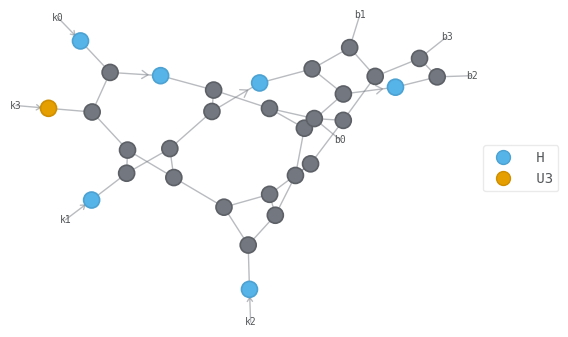

In [116]:
# types of gate
V.draw(color=['H', "U3"], show_inds=True)

In [119]:
samps = circ.sample(10,[0,1,2])
[i for i in samps]

/Users/joeg/anaconda3/envs/quantum/lib/python3.11/site-packages/cotengra/hyperoptimizers/hyper.py:36: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead. `kahypar` is highly recommended for the best quality contraction paths.
  warnings.warn(
/Users/joeg/anaconda3/envs/quantum/lib/python3.11/site-packages/cotengra/hyperoptimizers/hyper.py:75: UserWarning: Couldn't find `optuna`, `cmaes`, or `nevergrad` so will use completely random sampling in place of hyper-optimization. It is recommended to install one of these libraries for higher quality hyper-optimization.
  warnings.warn(


['000', '000', '001', '000', '000', '000', '000', '000', '000', '000']